# Football events 

This is data of footballing events in europe. As an avid fan of football and sport in general I wanted to have a look at a sporting data set. This will mainly be visualisations.

source - https://www.kaggle.com/secareanualin/football-events

In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
import seaborn as sns

# events = pd.read_csv("../input/events.csv")
# game_info=pd.read_csv("../input/ginf.csv")

plt.style.use('ggplot')
%matplotlib inline

In [304]:
events = pd.read_csv("input/football-events/events.csv")

In [80]:
ginf = pd.read_csv("input/football-events/ginf.csv")

In [477]:
events.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Key Pass,Away,Hamburg SV,Borussia Dortmund,...,NaN,NaN,High and wide,Off target,0,Left side of the box,left foot,Pass,Open play,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,NaN,Home,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,NaN,Home,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,NaN,Home,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,NaN,Away,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,Defensive half,NaN,None,NaN,0


In [425]:
ginf.tail()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
10107,xAkY8l6R/,/soccer/italy/serie-a/genoa-crotone-xAkY8l6R/,True,2017-01-22,I1,2017,italy,Genoa,Crotone,2,2,1.97,4.35,8.0,1.95,2.03,2.03,1.86
10108,xSU9scI9/,/soccer/england/premier-league/chelsea-hull-ci...,True,2017-01-22,E0,2017,england,Chelsea,Hull,2,0,1.19,8.50,20.0,1.54,2.68,2.40,1.66
10109,xY7uZwOI/,/soccer/france/ligue-1/monaco-lorient-xY7uZwOI/,True,2017-01-22,F1,2017,france,AS Monaco,Lorient,4,0,1.32,6.24,11.5,1.53,3.08,1.80,2.25
10110,YyeGxMX8/,/soccer/spain/laliga/betis-gijon-YyeGxMX8/,True,2017-01-22,SP1,2017,spain,Real Betis,Sporting Gijon,0,0,1.74,4.07,5.9,2.20,1.89,2.05,1.86
10111,z5L2OT5E/,/soccer/italy/serie-a/atalanta-sampdoria-z5L2O...,True,2017-01-22,I1,2017,italy,Atalanta,Sampdoria,1,0,1.79,3.96,5.4,1.90,2.07,1.80,2.16


In [216]:
df3 = pd.read_csv("input/football-events/dictionary.txt",header= None)

In [217]:
df3.head()

,0
0,event_type
1,0\tAnnouncement
2,1\tAttempt
3,2\tCorner
4,3\tFoul


In [218]:
df3.shape

(75, 1)

We can see that we need to split the file into multiple dictionaries so that we can sub them in for the numbers in some columns in the other data frames

In [220]:
df3[['id','name']] = df3.loc[:,0].str.split('\t',expand=True)
df3.drop(df3.columns[0], axis=1,inplace = True)

In [248]:
df3.id = pd.to_numeric(df3.id, errors='coerce')

In [299]:
et1 = df3[1:13]
et2 = df3[14:18]
side = df3[19:21]
shot_place = df3[22:35]
shot_outcome = df3[36:40]
location = df3[41:60]
bodypart =df3[61:64]
assist_method = df3[65:70]
situation = df3[71:75]

In [301]:
et1_dict  = list(et1.set_index('id').to_dict().values()).pop()
et2_dict  = list(et2.set_index('id').to_dict().values()).pop()
side_dict  = list(side.set_index('id').to_dict().values()).pop()
shot_place_dict  = list(shot_place.set_index('id').to_dict().values()).pop()
shot_outcome_dict  = list(shot_outcome.set_index('id').to_dict().values()).pop()
location_dict  = list(location.set_index('id').to_dict().values()).pop()
bodypart_dict  = list(bodypart.set_index('id').to_dict().values()).pop()
assist_method_dict  = list(assist_method.set_index('id').to_dict().values()).pop()
situation_dict  = list(situation.set_index('id').to_dict().values()).pop()

In [305]:
events['event_type'] = events['event_type'].map(et1_dict)
events['event_type2'] = events['event_type2'].map(et2_dict)
events['side'] = events['side'].map(side_dict)
events['shot_place'] = events['shot_place'].map(shot_place_dict)
events['shot_outcome'] = events['shot_outcome'].map(shot_outcome_dict)
events['location'] = events['location'].map(location_dict)
events['bodypart'] = events['bodypart'].map(bodypart_dict)
events['assist_method'] = events['assist_method'].map(assist_method_dict)
events['situation'] = events['situation'].map(situation_dict)

In [306]:
events.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Key Pass,Away,Hamburg SV,Borussia Dortmund,...,NaN,NaN,High and wide,Off target,0,Left side of the box,left foot,Pass,Open play,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,NaN,Home,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,NaN,Home,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,NaN,Home,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,NaN,Away,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,Defensive half,NaN,None,NaN,0


In [353]:
goals=events[events["is_goal"]==1]

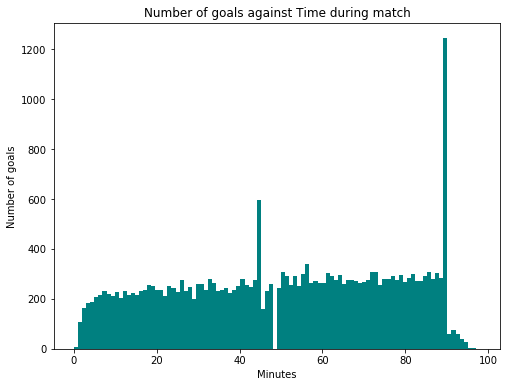

In [308]:
fig=plt.figure(figsize=(8,6))
plt.hist(goals.time,width=1,bins=100,color="teal")   
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.title("Number of goals against Time during match")

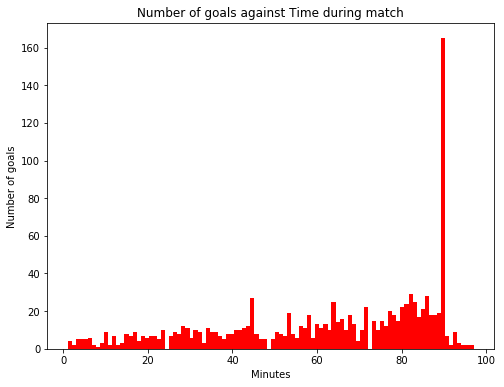

In [310]:
redcards=events[events["event_type"]=="Red card"]
fig=plt.figure(figsize=(8,6))
plt.hist(redcards.time,width=1,bins=100,color="red")   
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.title("Number of goals against Time during match")

In [311]:
et1

,id,name
1,0.0,Announcement
2,1.0,Attempt
3,2.0,Corner
4,3.0,Foul
5,4.0,Yellow card
6,5.0,Second yellow card
7,6.0,Red card
8,7.0,Substitution
9,8.0,Free kick won
10,9.0,Offside


In [312]:
yellowcard=events[events["event_type"]=='Yellow card']
yellowcard2=events[events["event_type"]=='Second yellow card']
redcards=events[events["event_type"]=='Red card']

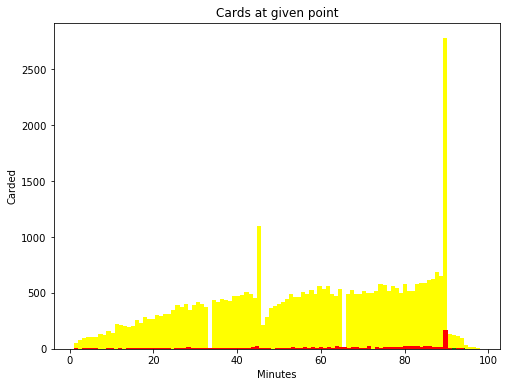

In [313]:
fig=plt.figure(figsize=(8,6))
plt.hist(yellowcard.time,width=1,bins=100,color="yellow")  
plt.hist(yellowcard2.time,width=1,bins=100,color="green") 
plt.hist(redcards.time,width=1,bins=100,color="red") 
plt.xlabel("Minutes")
plt.ylabel("Carded")
plt.title("Cards at given point")

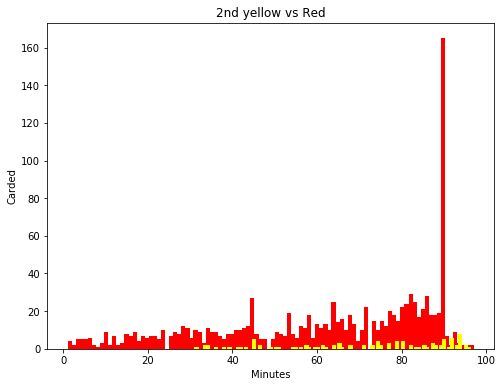

In [314]:
fig=plt.figure(figsize=(8,6))  
plt.hist(redcards.time,width=1,bins=100,color="red") 
plt.hist(yellowcard2.time,width=1,bins=100,color="yellow") 
plt.xlabel("Minutes")
plt.ylabel("Carded")
plt.title("2nd yellow vs Red")

In [315]:
goals.bodypart.value_counts()

right foot    13451
left foot      6758
head           4236
Name: bodypart, dtype: int64

In [ ]:
fig=plt.figure(figsize=(8,6))  
plt.hist(events.bodypart,width=1,bins=100,color="red") 
plt.hist(yellowcard2.time,width=1,bins=100,color="yellow") 
plt.xlabel("Minutes")
plt.ylabel("Carded")
plt.title("2nd yellow vs Red")

In [ ]:
# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

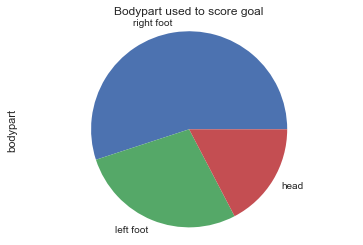

In [355]:
goals.bodypart.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Bodypart used to score goal')

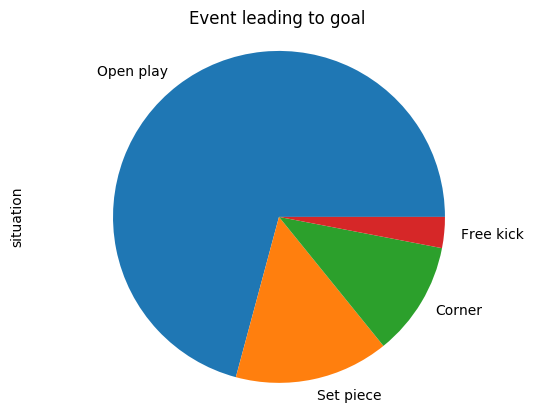

In [436]:
goals.situation.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Event leading to goal')

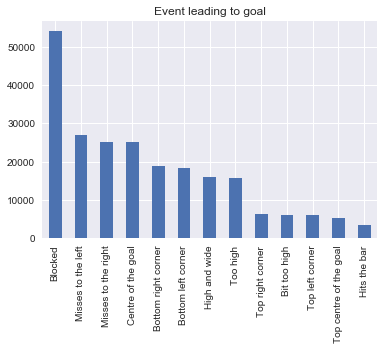

In [372]:
events.shot_place.value_counts().plot(kind='bar')
plt.title('Event leading to goal')

In [407]:
top_scoring_teams

Barcelona              586
Real Madrid            573
Bayern Munich          453
Paris Saint-Germain    447
Napoli                 403
Juventus               401
Borussia Dortmund      392
AS Roma                373
Lyon                   355
Atletico Madrid        347
Name: event_team, dtype: int64

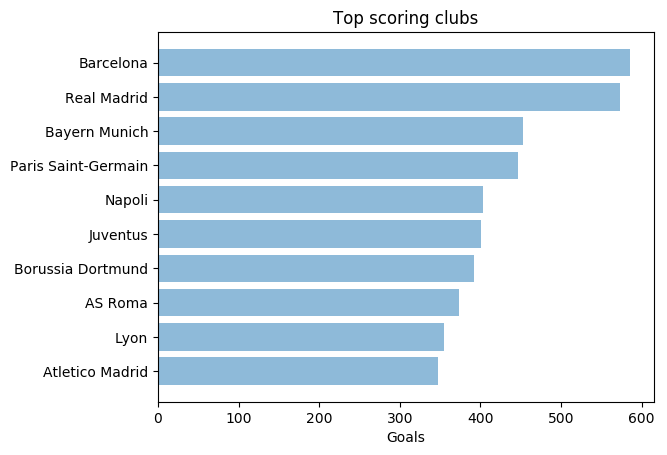

In [440]:
plt.rcdefaults()
fig, ax = plt.subplots()

top_scoring_teams = goals.event_team.value_counts().head(10)
values = top_scoring_teams.keys().tolist()
counts = top_scoring_teams.tolist()
y_pos = np.arange(len(values))

 
ax.barh(y_pos, counts, align='center', alpha=0.5)
ax.invert_yaxis()

plt.yticks(y_pos, values)
plt.xlabel('Goals')
plt.title('Top scoring clubs')
 
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 4
means_frank = (90, 55, 40, 65)
events.shoo

means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Frank')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Guido')
 
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [427]:
events.shot_outcome.value_counts()

Off target     92827
On target      78014
Blocked        54082
Hit the bar     3575
Name: shot_outcome, dtype: int64

In [430]:
pd.crosstab(events.shot_place,goals.is_goal)

is_goal,1.0
shot_place,
Bottom left corner,7212
Bottom right corner,6932
Centre of the goal,4446
Top left corner,2023
Top right corner,2157


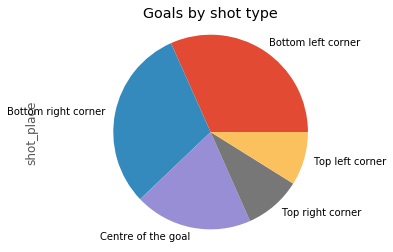

In [439]:

goals.shot_place.value_counts().plot('pie')

plt.axis('equal')
plt.title('Goals by shot type')

In [461]:
counts = events.shot_outcome.value_counts()
percent = events.shot_outcome.value_counts(normalize=True) \
           .mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent})

,counts,per
Off target,92827,40.6%
On target,78014,34.1%
Blocked,54082,23.7%
Hit the bar,3575,1.6%


In [474]:
events[(events['shot_outcome'] == 'On target')].is_goal.value_counts(normalize= True) * 100

0    69.472146
1    30.527854
Name: is_goal, dtype: float64

Only 34.1% of the shots are on target and of those only ~30.53% are goals. Any shot is on average a goal only a goal roughly 10% of the time. (this is only true for the given data which is probably only from top leagues)